In [57]:
import scipy.stats as sts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline




Выберите ваше любимое непрерывное распределение. Сгенерируйте из него выборку объёма 1000,
постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения
вашей случайной величины (чтобы величины были в одном масштабе, 
не забудьте выставить у гистограммы значение параметра normed=True)
Примечание: курс старый, normed is deprecated

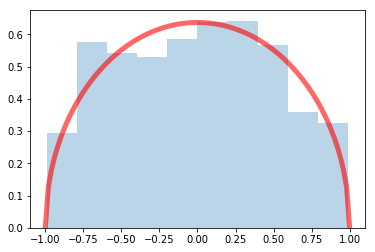

In [58]:
fig, ax = plt.subplots(1, 1)

dist = sts.semicircular() #distribution

n=1000
sample = dist.rvs(n) #sample

x= np.linspace(-1,1,100) #x
ax.plot(x, dist.pdf(x),'r-', lw=5, alpha=0.6, label='CDF') #plot cumulative density function
ax.hist(sample,  density=True, histtype='stepfilled', alpha=0.3) #plot histogram

plt.show()

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок.
Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n
и постройте гистограммы распределений их выборочных средних.
Используя информацию о среднем и дисперсии исходного распределения, посчитайте значения параметров нормальных распределений,
которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.
Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее
и дисперсию вашей случайной величины, а не их выборочные оценки.
Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения
будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение
Опишите разницу между полученными распределениями при различных значениях n.
Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?


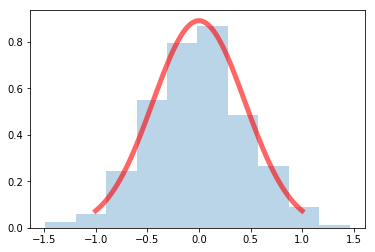

In [84]:
#N = 5

n =5
df = pd.DataFrame()

#produce samples
for i in range(1000):
    sample = pd.Series(dist.rvs(n)) #sample
    df = pd.concat([df,sample],axis = 1)
    
sample_means = df.mean()

fig, ax = plt.subplots(1, 1)
norm = sts.norm(dist.stats('m'),np.sqrt(dist.stats('v')/n)) #sampling distribution based on initial distribution mean and variance

x= np.linspace(-1,1,100) #x
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='CDF') #plot  density function
ax.hist(sample_means,  density=True, histtype='stepfilled', alpha=0.3) #plot histogram

plt.show()

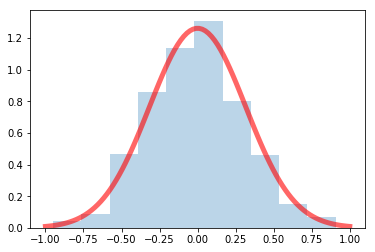

In [85]:
#N = 10

n =10
df = pd.DataFrame()

#produce samples
for i in range(1000):
    sample = pd.Series(dist.rvs(n)) #sample
    df = pd.concat([df,sample],axis = 1)
    
sample_means = df.mean()

fig, ax = plt.subplots(1, 1)
norm = sts.norm(dist.stats('m'),np.sqrt(dist.stats('v')/n)) #sampling distribution based on initial distribution mean and variance

x= np.linspace(-1,1,100) #x
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='CDF') #plot  density function
ax.hist(sample_means,  density=True, histtype='stepfilled', alpha=0.3) #plot histogram

plt.show()

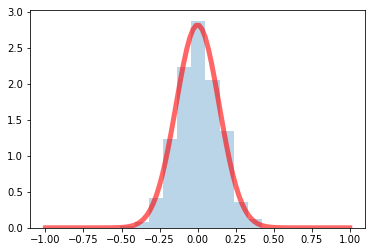

In [86]:
#N = 50

n =50
df = pd.DataFrame()

#produce samples
for i in range(1000):
    sample = pd.Series(dist.rvs(n)) #sample
    df = pd.concat([df,sample],axis = 1)
    
sample_means = df.mean()

fig, ax = plt.subplots(1, 1)
norm = sts.norm(dist.stats('m'),np.sqrt(dist.stats('v')/n)) #sampling distribution based on initial distribution mean and variance

x= np.linspace(-1,1,100) #x
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='CDF') #plot  density function
ax.hist(sample_means,  density=True, histtype='stepfilled', alpha=0.3) #plot histogram

plt.show()

Таким образом, видим, что теоретическое распределение выборочных средних сходно с реальным, и разброс их значений снижается по мере увеличения размера выборки.